

1. Обучить, нейронную сеть на Keras на датасете MNIST.

In [ ]:
#!pip install keras
#!pip install scikeras[tensorflow]

In [ ]:
#!pip install mnist

In [1]:
import numpy as np
import pandas as pd
import mnist
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV

In [2]:
from scikeras.wrappers import KerasClassifier

### Building model for digit recognition

In [10]:
import tempfile
tempfile.gettempdir()

'C:\\Users\\User\\AppData\\Local\\Temp'

In [3]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

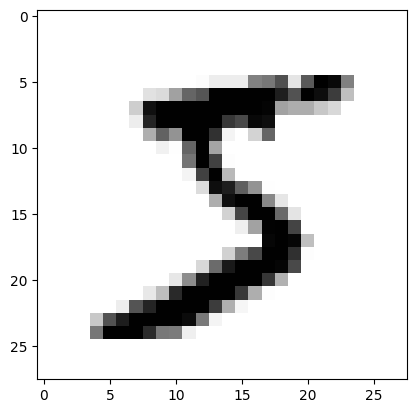

In [4]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train_images()[0]/255, cmap=plt.cm.binary)
#print(mnist.train_images()[1]/255)
#print(to_categorical(train_labels))
#print(train_labels)



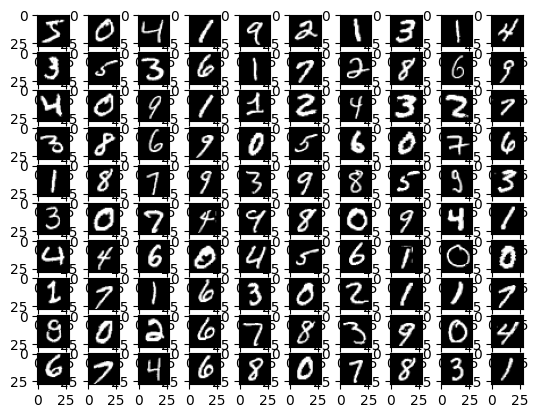

In [6]:
ttt_images = mnist.train_images()
ttt_images = (1 - (ttt_images/255))

for i in range(10*10):
    plt.subplot(10, 10, i+1)
    plt.imshow(ttt_images[i],  cmap=plt.cm.binary)
plt.show()

In [5]:
input_shape = (28, 28, 1)

In [17]:
model_1 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(32),
    Dense(1)
    ] )

In [18]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


c:\AIcode\examples\tl\1\venv\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1162 - loss: 5.3180e-07
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1179 - loss: 5.3024e-07
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1192 - loss: 5.3032e-07
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1180 - loss: 5.3264e-07
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1192 - loss: 5.2905e-07
CPU times: total: 37.6 s
Wall time: 29.9 s


In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
model_2 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [14]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
%%time

history2 = model_2.fit(x_train, y_train_cat, batch_size=256, epochs=10)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8210 - loss: 0.6448
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9539 - loss: 0.1536
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9706 - loss: 0.0994
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9795 - loss: 0.0703
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9841 - loss: 0.0546
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9873 - loss: 0.0441
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9906 - loss: 0.0352
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9925 - loss: 0.0270
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9943 - loss: 0.0219
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9960 - loss: 0.0151
CPU times: total: 1min 28s
Wall time: 47.9 s


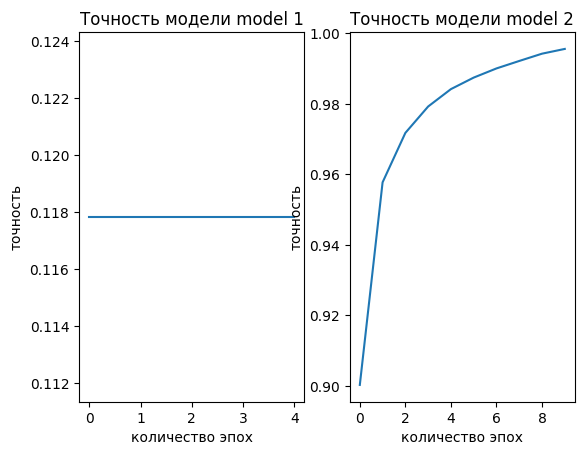

In [21]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Точность модели model 1')
plt.ylabel('точность')
plt.xlabel('количество эпох')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.title('Точность модели model 2')
plt.ylabel('точность')
plt.xlabel('количество эпох')

plt.show()

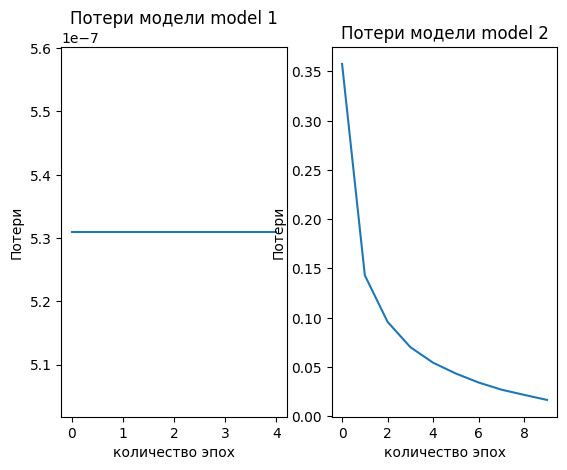

In [22]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Потери модели model 1')
plt.ylabel('Потери')
plt.xlabel('количество эпох')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.title('Потери модели model 2')
plt.ylabel('Потери')
plt.xlabel('количество эпох')

plt.show()

In [23]:
model_2.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9720 - loss: 16.9202


[14.305610656738281, 0.9768999814987183]

In [24]:
%%time

history3 = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9478 - loss: 15.8802 - val_accuracy: 0.9488 - val_loss: 1.4173
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9523 - loss: 0.6067 - val_accuracy: 0.9242 - val_loss: 0.6989
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9422 - loss: 0.3516 - val_accuracy: 0.9327 - val_loss: 0.5966
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9399 - loss: 0.3237 - val_accuracy: 0.9466 - val_loss: 0.4160
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9503 - loss: 0.2223 - val_accuracy: 0.9395 - val_loss: 0.3202
CPU times: total: 2min 10s
Wall time: 1min 29s


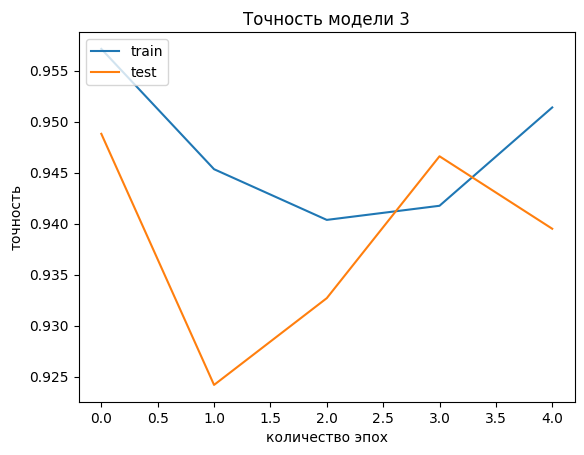

In [25]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Точность модели 3')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

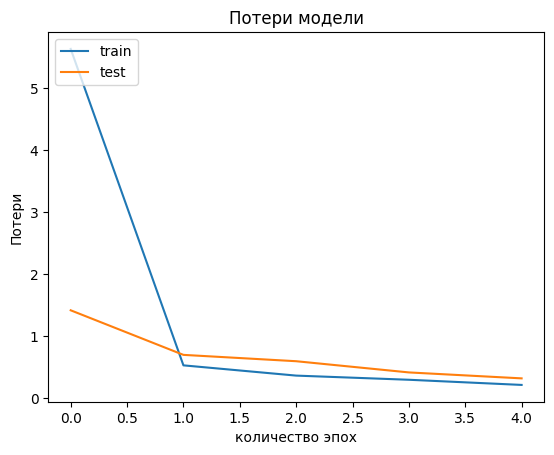

In [26]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

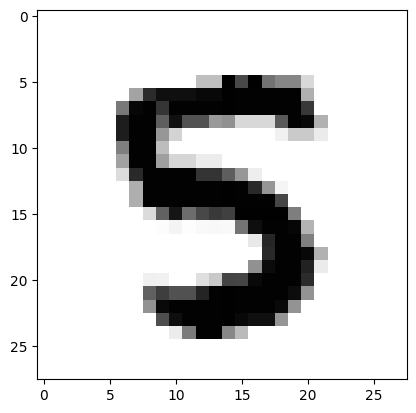

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1: 5


In [27]:
n_rec=120
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [25]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [26]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

c:\AIcode\examples\tl\1\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8516 - loss: 0.5051
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9590 - loss: 0.1413
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9710 - loss: 0.0935
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9760 - loss: 0.0790
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9796 - loss: 0.0616
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.1070
**************
Loss - 0.09, Metrics - 0.973


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


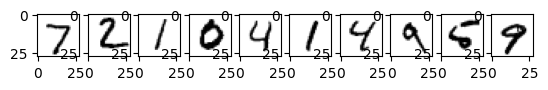

Predictions: [7 2 1 0 4 1 4 9 6 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


In [27]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape(28, 28),  cmap=plt.cm.binary)
plt.show()

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

In [31]:
# сохранение модели и весов в старом виде
model.save('./my_mnist.h5')

# сохранение модели и весов в новом виде
model.save('./my_mnist.keras')

# сохранение модели и весов в новом виде
model.export('./my_mnist')

INFO:tensorflow:Assets written to: ./my_mnist\assets


INFO:tensorflow:Assets written to: ./my_mnist\assets


Saved artifact at './my_mnist'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 784), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1882055993552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882055985680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882055994896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882055993936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882055995088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1882055986064: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Picking params via GridSearchCV

In [34]:
batch_size = [ 500, 1000]
epochs = [5, 10]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [ ]:
model = KerasClassifier(create_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

In [36]:
print(grid_result.best_score_, grid_result.best_params_)

0.9577833333333333 {'batch_size': 500, 'epochs': 10, 'optimizer': 'RMSprop'}


In [37]:
df = pd.DataFrame(grid_result.cv_results_)

In [38]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
4,500,10,RMSprop,0.957783
5,500,10,Adam,0.957700
3,500,10,SGD,0.955333
10,1000,10,RMSprop,0.949583
11,1000,10,Adam,0.948300
9,1000,10,SGD,0.947383
2,500,5,Adam,0.945083
1,500,5,RMSprop,0.944683
0,500,5,SGD,0.943850
8,1000,5,Adam,0.932550


ДОМАШНЕЕ ЗАДАНИЕ


In [1]:
# меняю оптимизатор, добавляю слой с увеличенным числом нейронов

In [2]:

def my_model(optimizer='RMSprop'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [28]:
model.summary()

NameError: name 'model' is not defined

In [41]:
to_categorical(test_labels)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
model = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

c:\AIcode\examples\tl\1\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8884 - loss: 0.3897
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9674 - loss: 0.1067
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9787 - loss: 0.0731
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0563
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9853 - loss: 0.0485
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9766 - loss: 0.1018
**************
Loss - 0.08, Metrics - 0.98


# добавляю валидационную выборку, меняю параметры

In [43]:
model_2 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=3, batch_size=64, validation_split=0.3)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/3
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.9891 - val_loss: 0.0389
Epoch 2/3
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9882 - val_loss: 0.0405
Epoch 3/3
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9851 - val_loss: 0.0567
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9693 - loss: 0.1198
**************
Loss - 0.1, Metrics - 0.976


In [44]:
model_3 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=7, batch_size=128, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9866 - val_loss: 0.0490
Epoch 2/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9872 - val_loss: 0.0463
Epoch 3/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.9892 - val_loss: 0.0418
Epoch 4/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9980 - loss: 0.0072 - val_accuracy: 0.9879 - val_loss: 0.0492
Epoch 5/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9982 - loss: 0.0060 - val_accuracy: 0.9880 - val_loss: 0.0515
Epoch 6/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9872 - val_loss: 0.0540
Epoch 7/7
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9868 - val_loss: 0.0603
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.1121
**************
Loss - 0.09, Metri

In [45]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:20]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [46]:
batch_size = [70, 80, 90]
epochs = [18, 25]
optimizer = ['RMSprop', 'Adam']

In [ ]:
model = KerasClassifier(my_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

In [48]:
print(grid_result.best_score_, grid_result.best_params_)

0.9757166666666667 {'batch_size': 90, 'epochs': 25, 'optimizer': 'Adam'}


In [49]:
df = pd.DataFrame(grid_result.cv_results_)

In [50]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
11,90,25,Adam,0.975717
2,70,25,RMSprop,0.975633
10,90,25,RMSprop,0.975150
3,70,25,Adam,0.975100
7,80,25,Adam,0.974583
0,70,18,RMSprop,0.974350
4,80,18,RMSprop,0.974350
5,80,18,Adam,0.974317
6,80,25,RMSprop,0.974217
1,70,18,Adam,0.973567


# Вывод:
1 Введение дополнительного скрытого слоя улучшает показатель метрики.   
2 Умеренное увеличение количества эпох улучшает показатель метрики.   
3 Умеренное увеличение batch_size ускоряет обучение.      
4 Наличие валидационной выборки препятствует переобучению.





In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')